### Training a single recurrent neuron

We define a recurrent neuron as follows: <br>
$y_{t+1} = 0.5y_t + 0.5x_t$

### Generate Data
Start with $y_0$ = $0$ <br>
Generate a series of random numbers $+1/-1$ with $50/50$ probability. This will constitute our input at each time step ($x_t$)

In [6]:
import numpy as np

In [7]:
def generate_inputs(n):
  """
  Inputs:
    n: int

  Outputs: 
    x_t : list of length n with either +1 or -1 generated randomly with 50/50 probability
  """
  ### Write your code here
  x_t = []
  for i in range(n):
    if(np.random.uniform() > 0.5):
      x_t.append(1)
    else:
      x_t.append(-1)
  
  return np.array(x_t)

In [8]:
def generate_outputs(x_t):
  """
  Inputs:
    x_t: list of length n with inputs to recurrent neuron

  Outputs:
    y_t : list of length n+1 with outputs generated using our definition of recurrent neuron 
  """
  ### Write your code here
  y_t = [0]
  for i in range(1, x_t.shape[0] + 1):
    y_t.append(0.5*y_t[i-1] + 0.5*x_t[i-1])
  return np.array(y_t)

### Training using BPTT
Write the train function that takes $y_t$ and $x_t$, starts with random values of $w$ and $g$ where 
$$
y_{t+1} = wx_{t} + gy_t \\
$$
and trains using BPTT to find values of $w$ and $g$
$$

Backpropagation of gradients
$$
dy_{hat_t} = \frac{\partial{E}}{\partial{y_{t+1}}} * \frac{\partial{y_{t+1}}}{\partial{y_t}} 
$$
$$
dw = \frac{\partial{y_{t+1}}}{\partial{w}} * \frac{\partial{E}}{\partial{y_{t+1}}} 
$$

In [9]:
def train_bptt(x_t, y_t, time_steps, epochs, w_his = None, g_his = None):
  """
  Inputs:
    x_t: list of length n with inputs to recurrent neuron
    y_t: list of length n+1 with outputs
    time_steps: int, number of timesteps to roll the rnn and do bptt
    epochs: number of epochs to train the rnn for
  
  Outputs:
    w, g: trained parameters of the model
  """
  ### Write your code here
  if(w_his == None):
    w_his = [np.random.rand(1)*0.01]
    g_his = [np.random.rand(1)*0.01] 

  y = [0]
  eta = 0.1

  for e in range(epochs):
    y = [0]
    for i in range(0, x_t.shape[0], time_steps):
    
      ts = min(x_t.shape[0] - i, time_steps)
      w = w_his[-1]
      g = g_his[-1]
      dy = [0]
      dyhat = np.zeros(ts + 1)
      dw = 0
      dg = 0

      ## Forward pass
      for t in range(i, i+ts):  ## I had used range(i+ts) earlier, but this works as well
        y.append(w*x_t[t] + g*y[t])
      

      ## Backward pass
      for j in range(ts):
        ## dy is gradient directly coming from error at a particular timestep
        ## E = 1/2(y - yd)^2 , so dy = dE/dy = y - yd
        dy.append(y[i+j+1]-y_t[i+j+1])
      
      for j in range(ts - 1, 0, -1):
        ## dyhat is gradient to y_t coming from dy_t+1 
        dyhat[j] = g*(dyhat[j+1] + dy[j+1])
        dw += x_t[i+j]*(dyhat[j+1] + dy[j+1])
        dg += y[i+j]*(dyhat[j+1] + dy[j+1]) 
      
      w_his.append(w - eta*dw)
      g_his.append(g - eta*dg)
  
  return w_his, g_his
  

In [10]:
x_t = generate_inputs(100)
y_t = generate_outputs(x_t)
w_his, g_his = train_bptt(x_t, y_t, 5, 100)

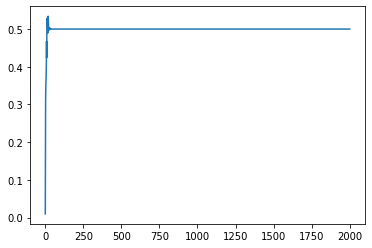

In [13]:
import matplotlib.pyplot as plt
plt.plot(w_his)

In [14]:
w_his[-10:]

[array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5])]

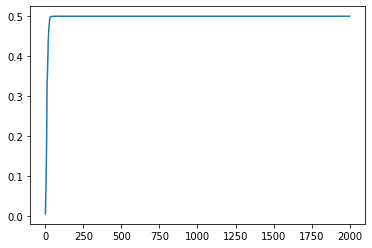

In [15]:
plt.plot(g_his)

In [16]:
g_his[-10:]

[array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5])]